# Supervised Learning Project

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle

## Download and Preprocessing (Prepare Data)

In [40]:
file_path = r"C:/Users/kevin/datasets/Churn.csv"
df = pd.read_csv(file_path)
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [42]:
df.duplicated().sum()

0

In [43]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [44]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['Tenure'] = df['Tenure'].astype(int)
df['Gender'] = pd.get_dummies(df['Gender'] , drop_first=True)

Female = 0 

Male = 1

In [45]:
encoder = OrdinalEncoder()
df['Geography'] = encoder.fit_transform(df[['Geography']])

France = 0

Germany = 1

Spain = 2

In [46]:
features = df.drop(['Exited', 'Surname','RowNumber','CustomerId'], axis=1)
target = df['Exited']

Dropped Exited b/c that is our target 

Dropped Surname and Customer ID because this two features that describe a person's identity has no impact on 

RowNumber is dropped because the amount of rows in the dataset does not affect if an individual will exit the bank

In [47]:
features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0,41,1,83807.86,1,0,1,112542.58
2,502,0.0,0,42,8,159660.80,3,1,0,113931.57
3,699,0.0,0,39,1,0.00,2,0,0,93826.63
4,850,2.0,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1,39,5,0.00,2,1,0,96270.64
9996,516,0.0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0.0,0,36,7,0.00,1,0,1,42085.58
9998,772,1.0,1,42,3,75075.31,2,1,0,92888.52


In [48]:
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [49]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  float64
 2   Gender           10000 non-null  uint8  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int32  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(3), int32(1), int64(5), uint8(1)
memory usage: 674.0 KB


In [50]:
features_train, features_test, target_train, target_test =train_test_split(features,target,test_size=0.2,random_state=12345)

features_train, features_valid, target_train, target_valid =train_test_split(features_train,target_train,test_size=.25,random_state=12345)

In [51]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)

(6000, 10)
(6000,)
(2000, 10)
(2000,)


In [52]:
scaler = StandardScaler()
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Geography','Gender','HasCrCard','IsActiveMember']
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train[numeric])
print(features_valid[numeric])
print(features_test[numeric])



      CreditScore       Age    Tenure   Balance  NumOfProducts  \
492     -0.134048 -0.078068 -0.369113  0.076163       0.816929   
6655    -1.010798  0.494555 -0.007415  0.136391      -0.896909   
4287     0.639554  1.353490 -1.454209  0.358435      -0.896909   
42      -0.990168  2.116987 -1.092511  0.651725      -0.896909   
8178     0.567351  0.685430  0.715982  0.813110       0.816929   
...           ...       ...       ...       ...            ...   
8819    -0.618839 -0.268942  1.801078  0.744283      -0.896909   
1537     1.743227 -1.032439  1.077681 -1.232442      -0.896909   
1408     0.567351 -0.650691  1.439380 -1.232442       0.816929   
7661    -0.412545  0.494555 -1.092511  0.615524      -0.896909   
3295     1.052142 -1.891374  1.439380 -1.232442      -0.896909   

      EstimatedSalary  Geography    Gender  HasCrCard  IsActiveMember  
492          0.331571  -0.905741 -1.103311  -1.550255        0.968496  
6655        -0.727858  -0.905741  0.906363   0.645055        0.

## Examine the Balance of Classes

0 - Stayed at the bank

1 - Left the bank

0    0.7963
1    0.2037
Name: Exited, dtype: float64


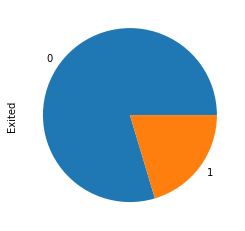

In [53]:
df['Exited'].value_counts(normalize=True).plot(kind='pie')
print(df['Exited'].value_counts(normalize=True))

In [54]:
target_prediction_constant = pd.Series(0,index=target.index)

In [55]:
print(accuracy_score(target, target_prediction_constant))

0.7963


79% of the of individuals stayed at the bank 

## Training the Model Without Taking Into Account the Imbalance

In [56]:
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
print('Accuracy Score:',accuracy_score(target_valid,predicted_valid))
print('F1 Score:', f1_score(target_valid,predicted_valid))

probabilities_valid = model.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('ROC-AUC:', auc_roc)

Accuracy Score: 0.8135
F1 Score: 0.2729044834307992
ROC-AUC: 0.7597290814615358


Accuracy Score: 0.855
F1 Score: 0.5245901639344263
ROC-AUC: 0.8094605313144254


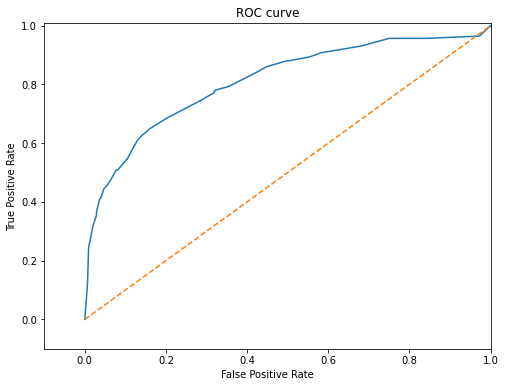

In [57]:
model = DecisionTreeClassifier(random_state=12345,max_depth=7)
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
print('Accuracy Score:',accuracy_score(target_valid,predicted_valid))
print('F1 Score:', f1_score(target_valid,predicted_valid))

probabilities_valid = model.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


print('ROC-AUC:', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [58]:
model = RandomForestClassifier(random_state=12345,n_estimators=30,max_depth=7)
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
print('Accuracy Score:',accuracy_score(target_valid,predicted_valid))
print('F1 Score:', f1_score(target_valid,predicted_valid))

probabilities_valid = model.predict_proba(features_valid)

probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print('ROC-AUC:', auc_roc)

Accuracy Score: 0.86
F1 Score: 0.5121951219512195
ROC-AUC: 0.8456810237808745


## Class Inbalance

Using Upsampling 

In [59]:
def upsample(features,target,repeat):
    feature_one = features[target == 1]
    feature_zero = features[target == 0]
    target_one = target[target == 1]
    target_zero = target[target == 0]

    features_upsampled = pd.concat([feature_zero] + [feature_one] * repeat)
    target_upsampled = pd.concat([target_zero] + [target_one] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 3
)


In [60]:
model = DecisionTreeClassifier(random_state=12345,max_depth=7)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid,predicted_valid))

F1: 0.5497076023391814
AUC-ROC: 0.7293492963970251


In [61]:
model = RandomForestClassifier(random_state=12345,n_estimators=30,max_depth=7)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid,predicted_valid))

F1: 0.5871121718377089
AUC-ROC: 0.7521168491175755


In [62]:
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid,predicted_valid))

F1: 0.4757894736842105
AUC-ROC: 0.68552213492201


Using DownSampling

In [63]:
def downsample(features,target,fraction):
    feature_one = features[target == 1]
    feature_zero = features[target == 0]
    target_one = target[target == 1]
    target_zero = target[target == 0]
    
    features_downsampled = pd.concat([feature_zero.sample(frac=fraction, random_state=12345)] + [feature_one])
    target_downsampled = pd.concat([target_zero.sample(frac=fraction,random_state=12345)] + [target_one])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled,target_downsampled,random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train,target_train,.1)

In [64]:
model = DecisionTreeClassifier(random_state=12345,max_depth=7)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid,predicted_valid))

F1: 0.4562737642585551
AUC-ROC: 0.6897224531447945


In [65]:
model = RandomForestClassifier(random_state=12345,n_estimators=30,max_depth=7)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid,predicted_valid))

F1: 0.4459627329192547
AUC-ROC: 0.6918325467836769


In [66]:
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
print('AUC-ROC:', roc_auc_score(target_valid,predicted_valid))

F1: 0.39782016348773835
AUC-ROC: 0.6314504886992762


## Final Model Test

In [67]:
model = RandomForestClassifier(random_state=12345,n_estimators=30,max_depth=7)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Accuracy:', accuracy_score(target_test,predicted_test))
print('F1:', f1_score(target_test, predicted_test))
print('AUC-ROC:', roc_auc_score(target_test,predicted_test))

Accuracy: 0.8275
F1: 0.623773173391494
AUC-ROC: 0.7700503669207096


We got the best results using the UpSampled method and RandomForestClassifier when training the model. Overall, we downloaded and prepared the data, validated different models, took account for the class imbalances and inbalance, and tested the final model. 

We now have a F1 score above the target 62% with a 83% accuracy, and 77% AUC-ROC score. 